In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
pd.options.display.max_rows = 10

In [7]:
allyears = pd.read_csv('allyears.csv.gz')

In [8]:
allyears_byyear = allyears.set_index(['sex','year']).sort_index()

In [10]:
allyears_byyear

name  number
sex year                   
F   1880       Mary    7065
    1880       Anna    2604
    1880       Emma    2003
    1880  Elizabeth    1939
    1880     Minnie    1746
...             ...     ...
M   2018      Zylas       5
    2018      Zyran       5
    2018      Zyrie       5
    2018      Zyron       5
    2018      Zzyzx       5

[1957046 rows x 2 columns]

In [9]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False)

name  number
sex year                 
M   2018     Liam   19837
    2018     Noah   18267
    2018  William   14516
    2018    James   13525
    2018   Oliver   13389
...           ...     ...
    2018   Gaylon       5
    2018   Gavynn       5
    2018    Gavon       5
    2018   Gaurav       5
    2018    Zzyzx       5

[14004 rows x 2 columns]

In [11]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                  
M   2018      Liam   19837
    2018      Noah   18267
    2018   William   14516
    2018     James   13525
    2018    Oliver   13389
    2018  Benjamin   13381
    2018    Elijah   12886
    2018     Lucas   12585
    2018     Mason   12435
    2018     Logan   12352

In [12]:
# get the top ten names for sex and year

def getyear(sex, year):
    return (allyears_byyear.loc[sex, year]             # select M/F, year
               .sort_values('number', ascending=False) # sort by most common
               .head(10)                               # only ten
               .reset_index()                          # lose the index
               .name)                                  # return a name-only Series

In [13]:
getyear('F', 2018)

0         Emma
1       Olivia
2          Ava
3     Isabella
4       Sophia
5    Charlotte
6          Mia
7       Amelia
8       Harper
9       Evelyn
Name: name, dtype: object

In [14]:
getyear('F', 2018).ndim

1

In [15]:
# create DataFrame with columns given by top ten name Series for range of years
pd.DataFrame({year: getyear('M',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [16]:
pd.DataFrame({year: getyear('F',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [17]:
# using a query on unindexed data
def plotname(sex, name):
    data = allyears.query('sex == @sex and name == @name')
    
    pp.plot(data.year, data.number, label=name)
    pp.axis(xmin=1880, xmax=2018)

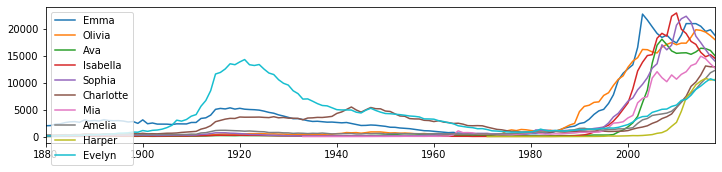

In [18]:
pp.figure(figsize=(12,2.5))

for name in getyear('F',2018):
    plotname('F', name)

pp.legend()

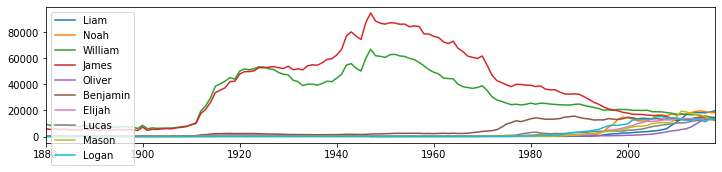

In [19]:
pp.figure(figsize=(12,2.5))

for name in getyear('M',2018):
    plotname('M', name)

pp.legend()

In [20]:
# get all time favorites: select F, group by name, sum over years, sort, cap 
alltime_f = allyears_byyear.loc['F'].groupby('name').sum().sort_values('number', ascending=False).head(10)

In [23]:
alltime_f

,number
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668
Barbara,1434397
Margaret,1248985
Susan,1121703
Dorothy,1107635


In [24]:
alltime_m = allyears_byyear.loc['M'].groupby('name').sum().sort_values('number', ascending=False).head(10)

In [25]:
alltime_m

,number
name,
James,5164280
John,5124817
Robert,4820129
Michael,4362731
William,4117369
David,3621322
Joseph,2613304
Richard,2565301
Charles,2392779
